# Frequent Itemset Mining algorithm

What Frequent Itemset Mining algorithm is trying to do is given a data set containing set of words; find the combinations of words that always appear together. It is important to market basket analysis and recommendation system. The system need to find out the combination of goods or games that people are interested in or given what people have purchased, the system can predict what he or she is interested in and have potential to buy something else. Frequent Itemset Mining algorithm can find shopping behavior of customers and sets of products that are usually bought together. Based on this kind of system. Advertisement can target customers who are of highly likelihood to purchase their goods. Make advertisement more efficient. Frequent Itemset Mining can also be used in web link analysis, fraud detection and fake news detection, etc.

There are 2 well-known Frequent Itemset Mining algorithms: **Apriori** and **FP-Growth**. Apriori is a breadth first algorithm. In contrast, FP-Growth is a depth first algorithm. Apriori is more straightforward and FG-Growth's time complexity is less.

## Apriori

The Apriori algorithm was proposed by Agrawal and Srikant in 1994. Apriori is designed to operate on databases containing transactions

Apriori is trying to efficiently find combinations of words whose frequency is larger than some threshold. The frequency of a combination of words means the times that they all appear in a input. For example, for dataset \[\['A','C','D'\],\['B','C','E'\],\['A','B','C','E'\],\['B','E'\]\], the combination of \['A','C'\] appears twice, so the frequency of \['A','C'\] is 2.


Apriori uses a "bottom up" approach, where frequent subsets are extended one item at a time. It generates candidate item sets of length k from item sets of length k-1. Groups of candidates will be checked to meet frequency standard. delete those item sets that has low frequency. Apriori is a breadth first algorithm. Using a property named Apriori to reduce search space. The Apriori property is the subsets of frequent itemset except empty set are also frequent. For example, 'A,B,C' appear frequently, then 'A,B' must appear frequently.

Apriori works as follows. First given some inputs(dataset). A input has words. For example, \['A','C','D'\]. So the dataset is like \[\['A','C','D'\],\['B','C','E'\],\['A','B','C','E'\],\['B','E'\]\]. Count every single word's freqency and delete those whose freqency is below some threshold (step 1). Then remaining words are conbined as pairs and words in each pair should be sorted(step 2). For example, from \['A','B','C'\] we can get 3 pairs: \['A','B'\], \['A','C'\], \['B','C'\]. Count each pair's frequency and delete those whose freqency is below some threshold(step 3). For remaining inputs, if 2 inputs' 1st to (n-1)th words are the same, we can get first input plus second input's last words. For example, from \[\['A','B'\],\['A','C'\],\['B','C'\]\] we can get\[\['A','B','C'\]\](step 4). If in step 4, what we get is not none, go to step 3. If in step 4, what we get is none, just return the list we get in step 3.

**pseudocode for Apriori is:**

Apriori(dataset,threshold)
   L1 = words in dataset

   for (k=2;Lk-1 ≠Φ ;k++) {
       Ck ={x union y[-1] |x,y belongs to Lk-1, x[:-1]==y[:-1]}

       Lk= {x|x belongs to Ck, frequency of x>=threshold}

       L = L ∪ Lk  
 }

 Return L

Let's do some examples.
For dataset: \[\['A','C','D'\],\['B','C','E'\],\['A','B','C','E'\],\['B','E'\]\]
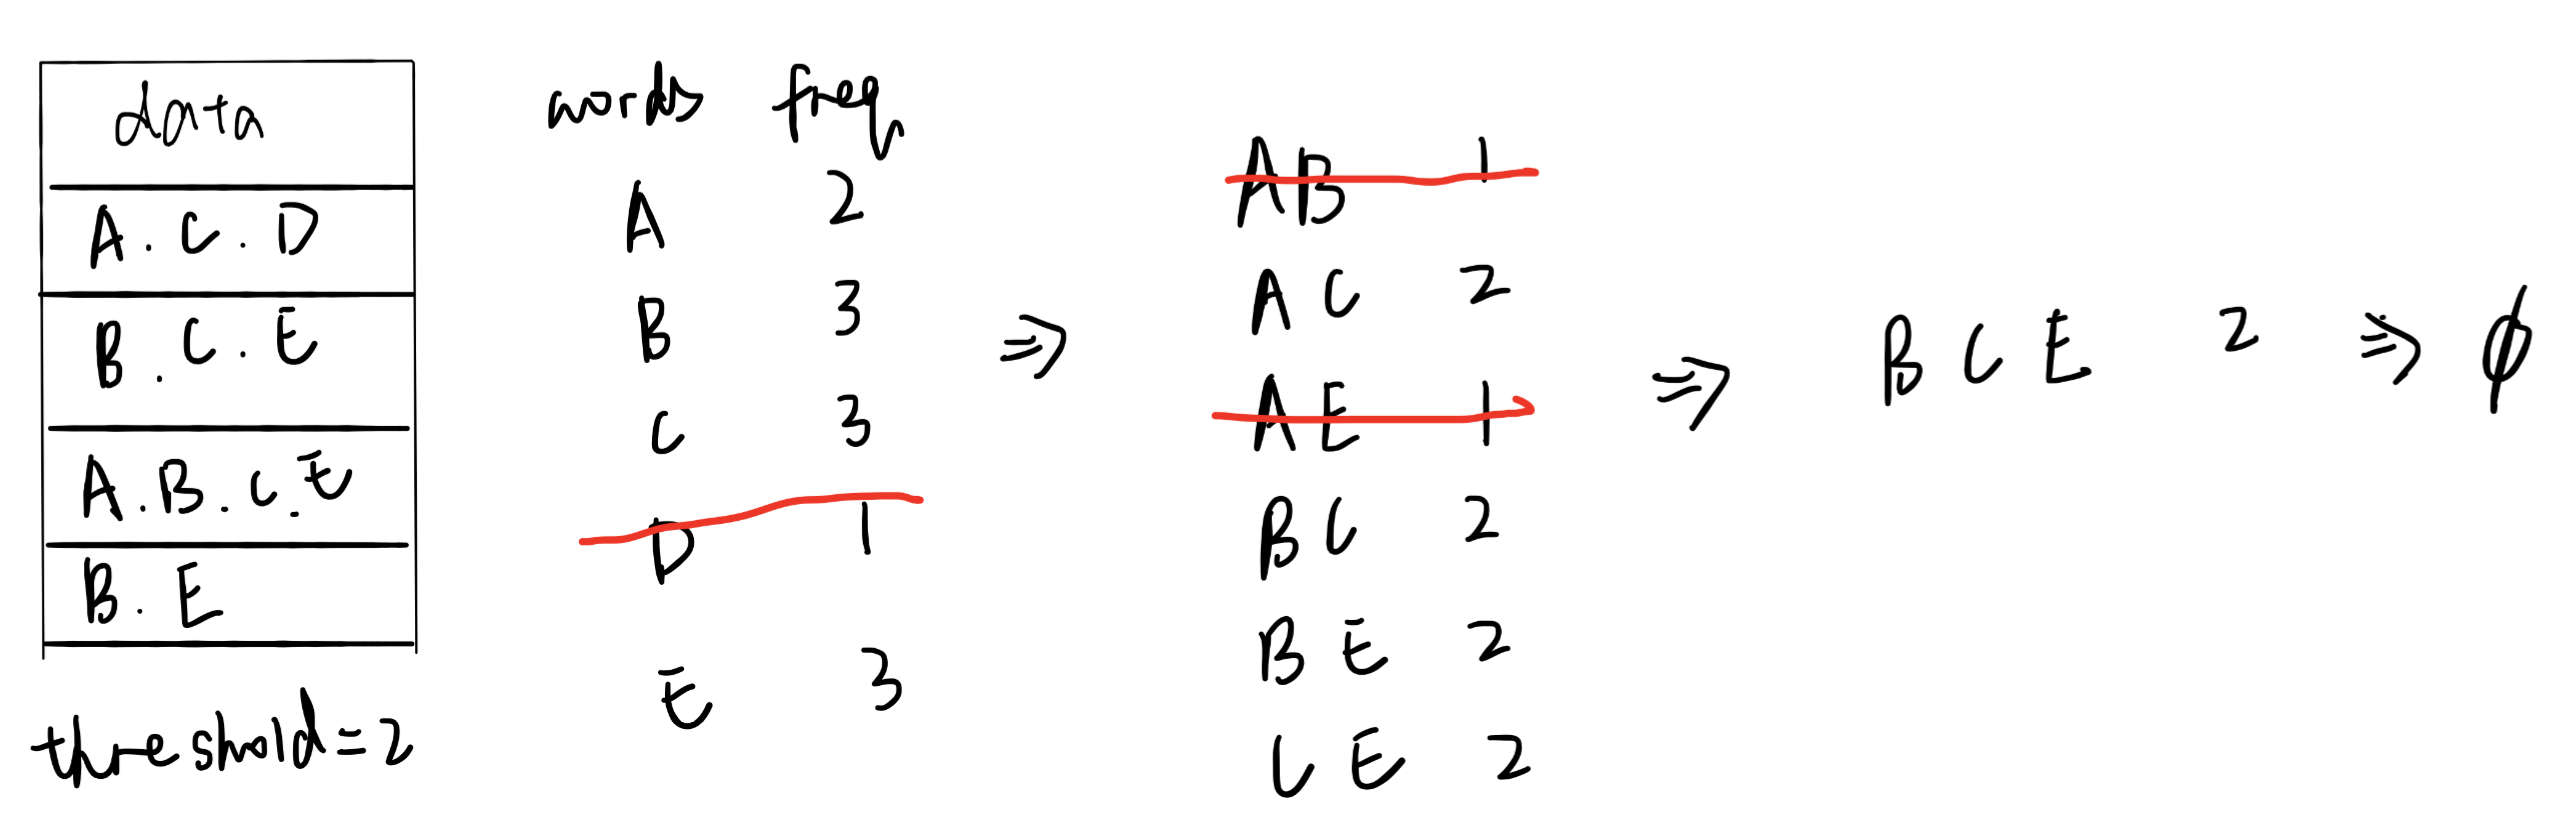

so the output of this Apriori example is \[\['A'\],
 \['C'\],
 \['B'\],
 \['E'\],
 \['A', 'C'\],
 \['B', 'C'\],
 \['C', 'E'\],
 \['B', 'E'\],
 \['B', 'C', 'E'\]\]

Python code is as follows.

In [206]:
from collections import defaultdict

In [207]:
def Apriori(dataset,low_threshold):
    freq_base=[]
    next_gen=[]
    max_number=0
    for i in dataset:
        f=defaultdict(int)
        for j in i:
            max_number+=1
            f[j]+=1
            if j not in next_gen:
                next_gen.append(j)
        freq_base.append(f)

    after_del=[]
    for i in next_gen:
        count=0
        for f in freq_base:
            count+=f[i]
        if count>=low_threshold:
            after_del.append(i)
    a=map(list,after_del)
    save=[]
    save+=a
    first=0
    while len(after_del)!=0:
        if len(after_del[0])==1:
            next_gen=[]
            
            for i in range(0,len(after_del)):
                for j in range(i+1,len(after_del)):
                    temp=[after_del[i],after_del[j]]
                    temp.sort()
                    next_gen.append(temp)
       
        else:
            next_gen=[]
            for i in range(0,len(after_del)):
                for j in range(i+1,len(after_del)):
                    if after_del[i][:-1]==after_del[j][:-1]:
                        t=after_del[i][:]
                        t.append(after_del[j][-1])
                        t.sort()
                        next_gen.append(t)
        
        after_del=[]
        for i in next_gen:
            count=0
            for f in freq_base:
                freq_min=max_number
                for j in i:
                    freq_min=min(f[j],freq_min)
                count+=freq_min
            if count>=low_threshold:
                after_del.append(i)
        print(after_del)
        if after_del:
            save.extend(after_del)

    return save  

In [209]:
small_database=[['A','C','D'],['B','C','E'],['A','B','C','E'],['B','E']]
Apriori(small_database,2)

[['A', 'C'], ['B', 'C'], ['C', 'E'], ['B', 'E']]
[['B', 'C', 'E']]
[]


[['A'],
 ['C'],
 ['B'],
 ['E'],
 ['A', 'C'],
 ['B', 'C'],
 ['C', 'E'],
 ['B', 'E'],
 ['B', 'C', 'E']]

output is \[\['A'\],
 \['C'\],
 \['B'\],
 \['E'\],
 \['A', 'C'\],
 \['B', 'C'\],
 \['C', 'E'\],
 \['B', 'E'\],
 \['B', 'C', 'E'\]\]

Based on above explanation. Every loop, Apriori needs to check n items to delete those whose frequency is below some threshold. Also every loop, Apriori needs to go through original dataset to get frequency. It is really time consuming. And there is another algorithm named FP-Growth that is less time consuming. It will be discussed it in the next section.

## FP-Growth 

Besides Apriori, there is another frequent itemset mining algorithm: FP-Growth. FP stands for frequent pattern. FP-Growth is a depth first algorithm. FP-Growth works because it finds frequent items in already known frequent items, which is same as Apriori, but FP-Growth is a different approach to accomplish it. 

FP-Growth is based on a new structure: FP Tree. FP Tree is the core of FP-Growth. FP Tree records 'long' combinations' frequency. Items which are more frequent are placed more near root. The value of root of FP Tree is usually None. 

FP Tree is set up by following methods. Sort words in every input based on their word frequency. Each input corresponds to a path in the tree. The higher frequency of the word is, the smaller depth it has. If there are two inputs: x and y, x[:k]==y[:k], the path corresponding to x and the path corresponding to y have shared prefix path. Before build the tree, we need to delete elements whose frequency is below some threshold. Here is an example about how to set up a FP Tree.
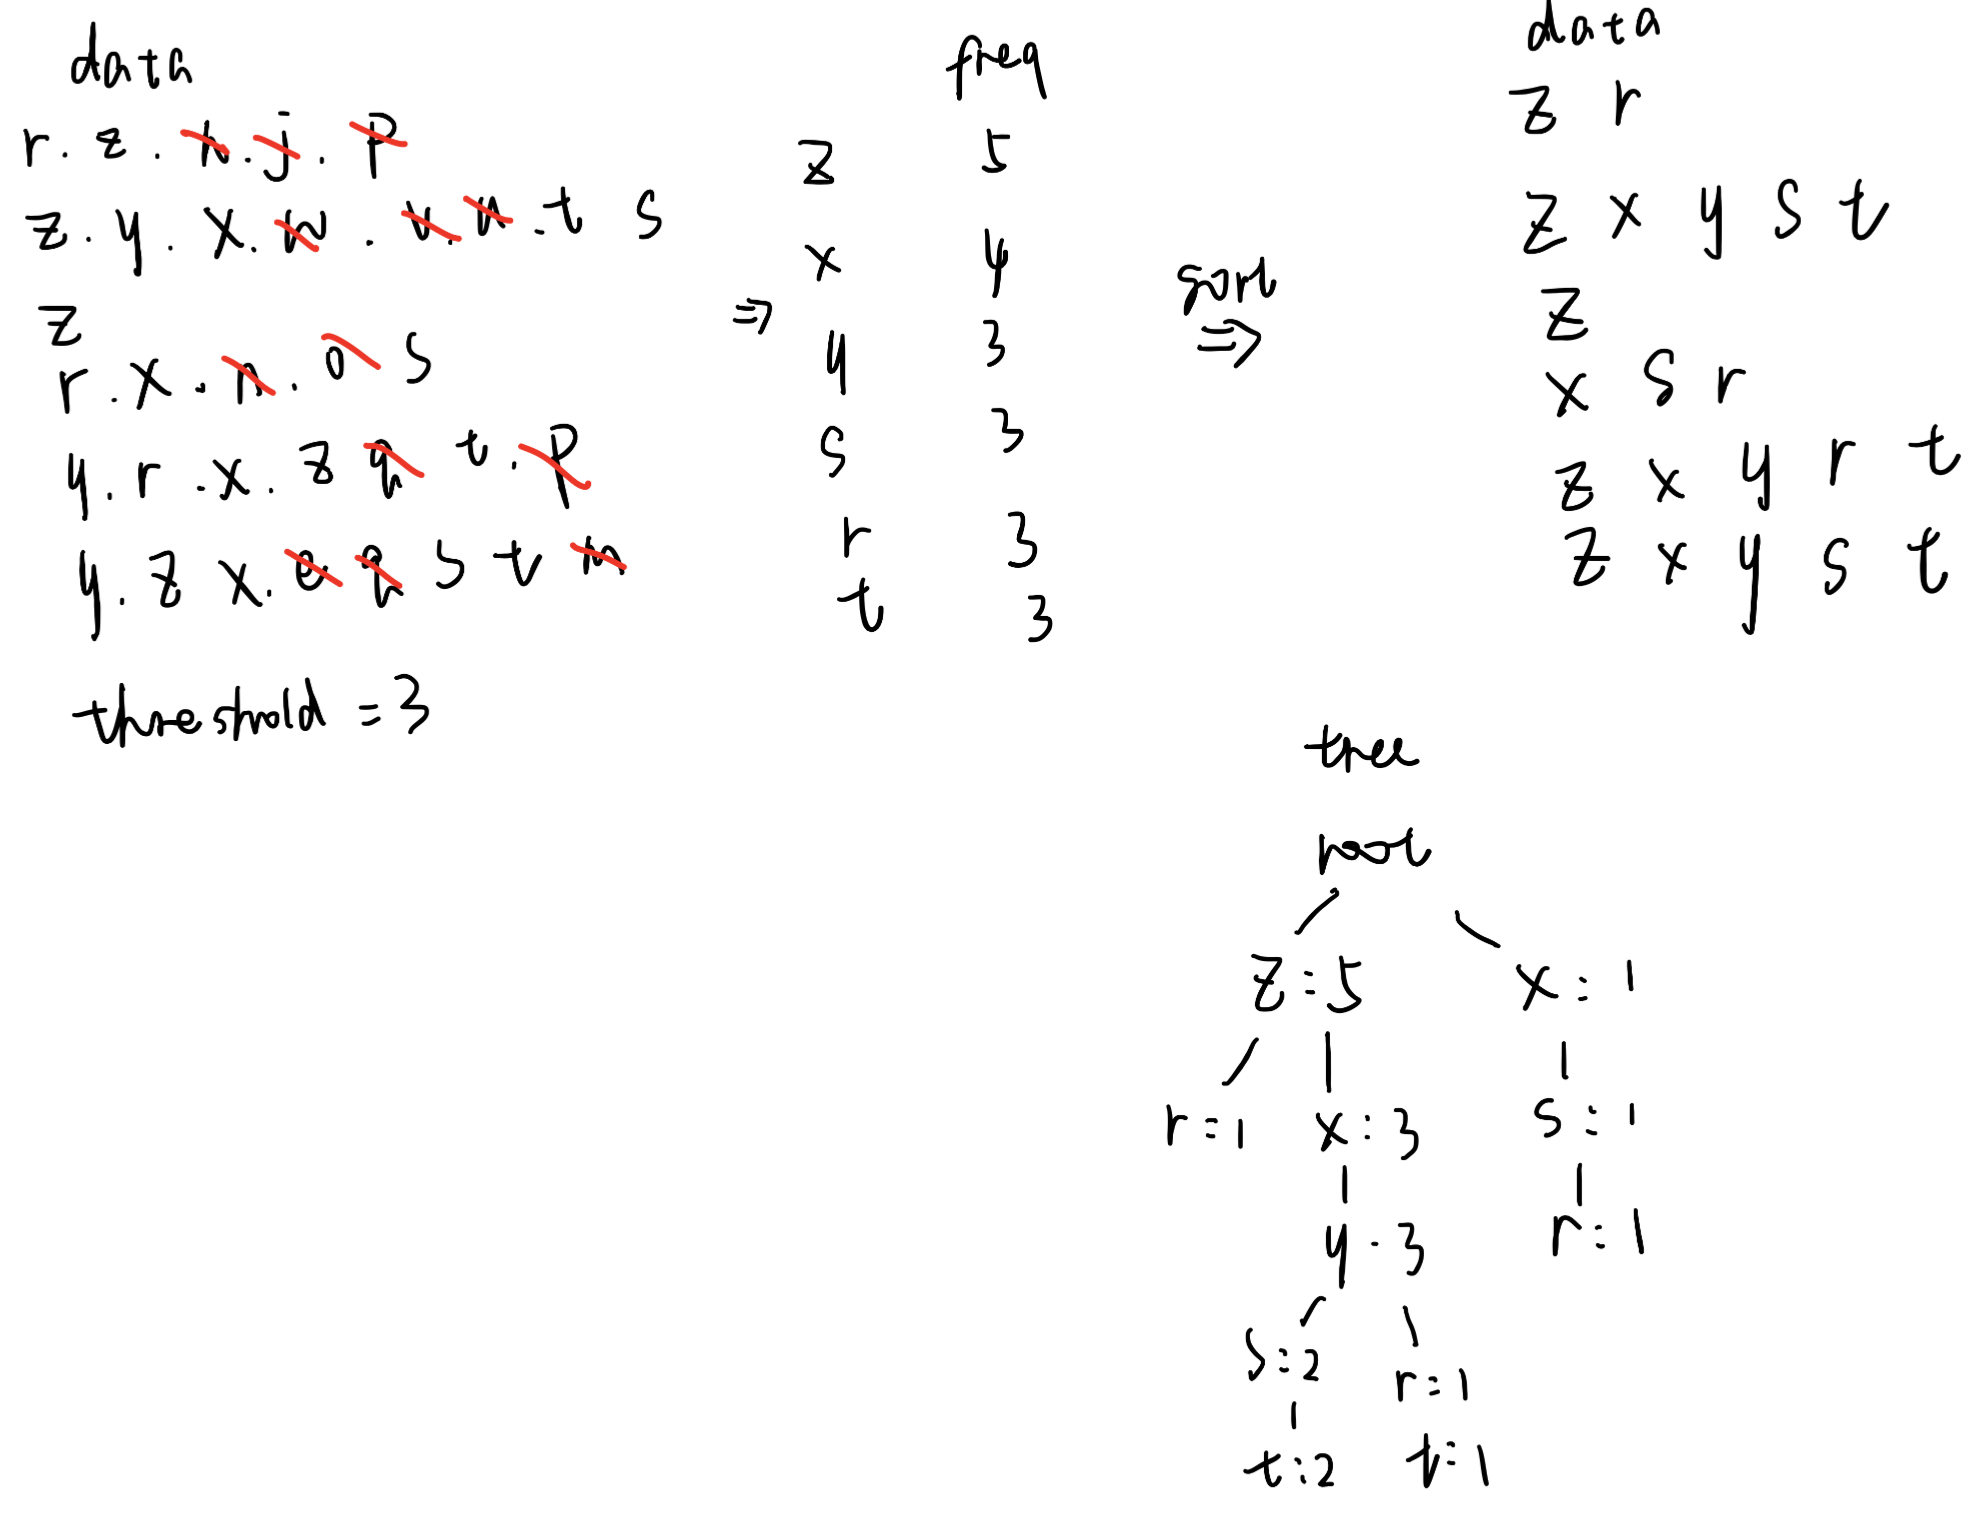

the steps to find Frequent Itemset is as follows.
step 1: for every leaf, find the corresponding paths to the leaf. Set the value of all the nodes on the path equal to the value of leaf node. Record the path whose value along the way is equal to or bigger than threshold.Record leaf in a list and delete leaf from tree.

step 2: every item in the same branch form conbinations with what is in the list and form a lots of new list. Put new lists in the result list.

step 3: repeat step 1 and step 2 until the number of element in the FP tree is equal to 1.

Take one branch as example. For item t: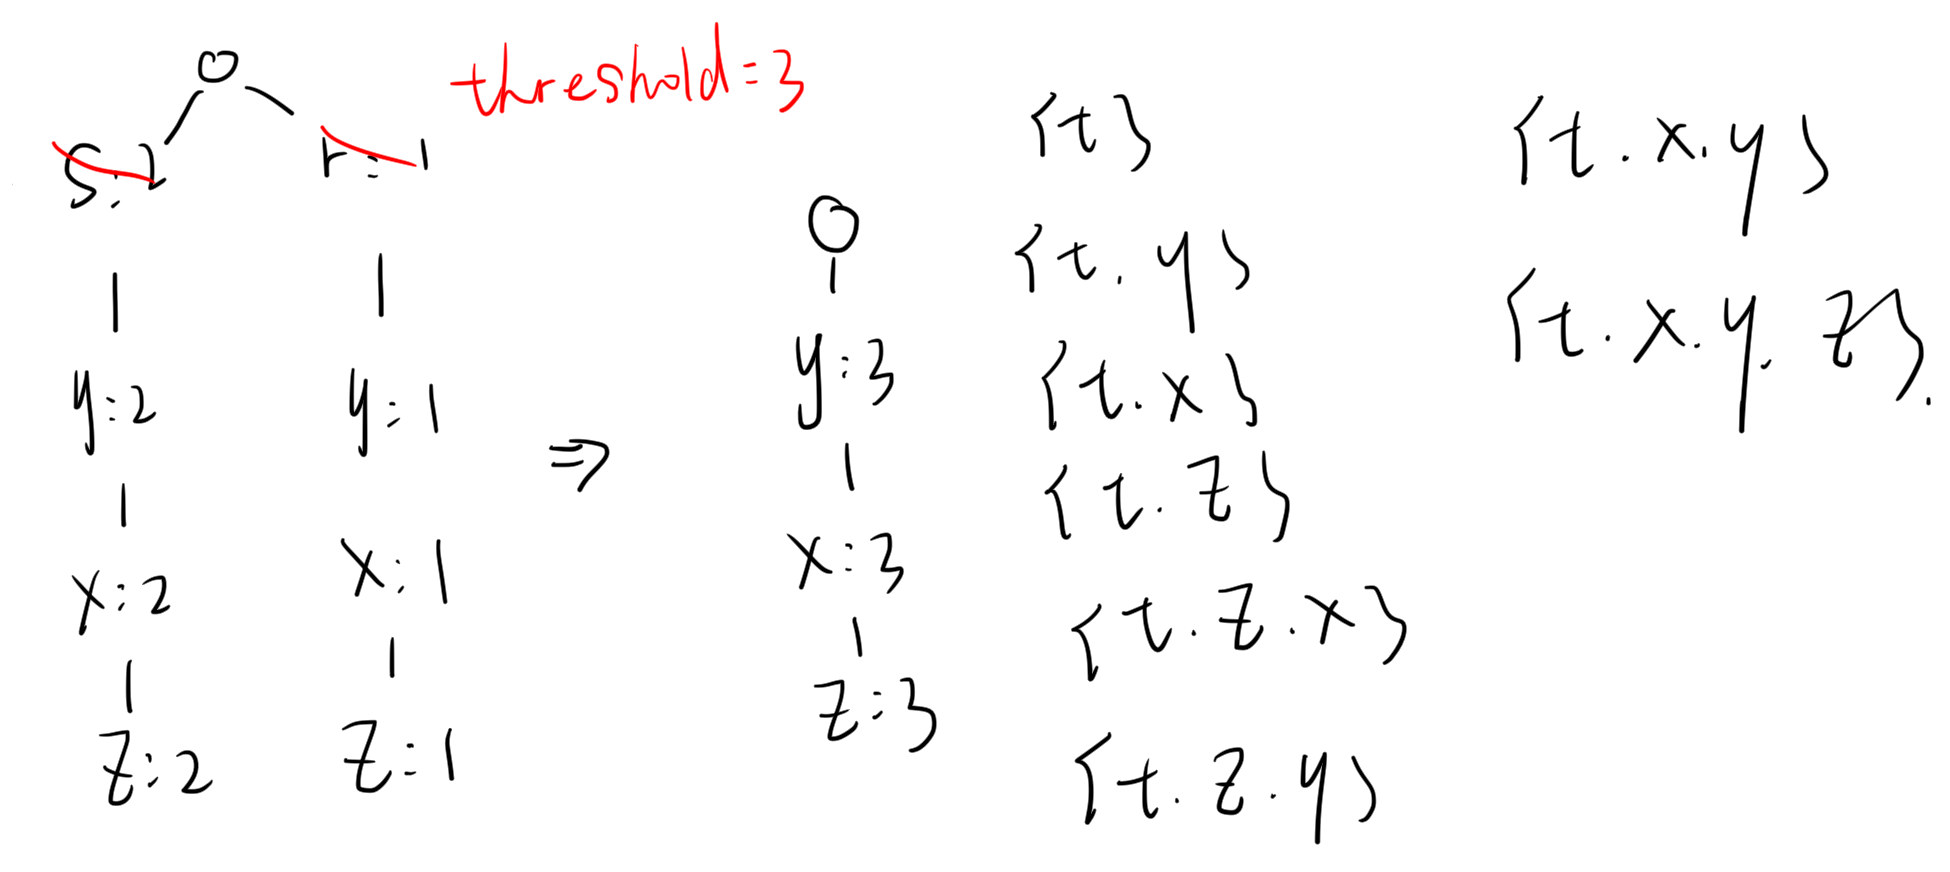

FP-Growth algorithm is more efficient than Apriori. FP-Growth only scan original dataset twice. On the contrary, Apriori may scan original dataset N times(N is equal to the number of single frequent item) in the worst case. The first time is when we count word frequency in the original dataset and the second time is when we build FP tree.

In [210]:
class treeNode:
    def __init__(self, name, frequency, parent):
        self.name = name
        self.count = frequency
        self.children = {}
        self.sameValueNode = None #pointer 
        self.parent = parent
    def addCount(self, numOccur):
        self.count += numOccur

In [211]:
def createTree(dataSet, threshold=1):
    tail = {}
    for d in dataSet:
        for Word in d:
            tail[Word] = tail.get(Word, 0) + dataSet[d]

    #delete raw frequency
    del_key=[]
    for k in tail.keys():
        if tail[k] < threshold:
            del_key.append(k)
    for d in del_key:
        del(tail[d])

    freqWordSet = set(tail.keys())
    if len(freqWordSet)>0:
        for k in tail:
            tail[k] = [tail[k], None]
        returnTree = treeNode('None', 1, None) 

        for tranSet, count in dataSet.items():
            localD = {}
            for Word in tranSet:
                if Word in freqWordSet:
                    localD[Word] = tail[Word][0]
            if len(localD) > 0:
                orderedWords = [v[0] for v in sorted(localD.items(), key=lambda p: p[1])]
                updateTree(orderedWords, returnTree, tail, count) 
    else:
        return None,None

    return returnTree, tail

def updateWord(node, targetNode):
    while (node.sameValueNode != None):
        node = node.sameValueNode
    node.sameValueNode = targetNode

def updateTree(Words, Tree, tail, count):
    if Words[0] in Tree.children:
        Tree.children[Words[0]].addCount(count)
    else:
        Tree.children[Words[0]] = treeNode(Words[0], count, Tree)
        if tail[Words[0]][1] == None:
            tail[Words[0]][1] = Tree.children[Words[0]]
        else:
            updateWord(tail[Words[0]][1], Tree.children[Words[0]])
    if len(Words) > 1:
        updateTree(Words[1::], Tree.children[Words[0]], tail, count)
            
def recordPrefixPath(leaf, prefixPath):
    if leaf.parent != None:
        prefixPath.append(leaf.name)
        recordPrefixPath(leaf.parent, prefixPath)

def findPrefixPath(node):
    allPaths = {}
    while node != None:
        prefixPath = []
        recordPrefixPath(node, prefixPath)
        if len(prefixPath) > 1:
            allPaths[frozenset(prefixPath[1:])] = node.count
        node = node.sameValueNode
    return allPaths

def FPGrowth(inTree, tail, threshold, preFix, freqWordList):
    raw_paths = [v[0] for v in sorted(tail.items(), key=lambda p: p[0],reverse=True)]
    for r in raw_paths:
        next_gen = preFix.copy()
        next_gen.add(r)
        freqWordList.append(next_gen)
        pathSet = findPrefixPath(tail[r][1])
        gen_Tree, myHead = createTree(pathSet, threshold)
        if myHead != None:
            FPGrowth(gen_Tree, myHead, threshold, next_gen, freqWordList)


In [212]:
data = [['r', 'z', 'h', 'j', 'p'],
               ['z', 'y', 'x', 'w', 'v', 'u', 't', 's'],
               ['z'],
               ['r', 'x', 'n', 'o', 's'],
               ['y', 'r', 'x', 'z', 'q', 't', 'p'],
               ['y', 'z', 'x', 'e', 'q', 's', 't', 'm']]
initSet = {}
for d in data:
    initSet[frozenset(d)] = 1
FPGrowthTree, lastWordTable =createTree(initSet, 3)

freqentWords = []
FPGrowth(FPGrowthTree, lastWordTable, 3, set([]), freqentWords)
print(freqentWords)

[{'z'}, {'y', 'z'}, {'z', 'x'}, {'y', 'z', 'x'}, {'z', 't'}, {'y', 'z', 't'}, {'x', 'z', 't'}, {'x', 'y', 'z', 't'}, {'y'}, {'x'}, {'y', 'x'}, {'x', 't'}, {'y', 'x', 't'}, {'s', 'x'}, {'t'}, {'y', 't'}, {'s'}, {'r'}]


output is: \[{'z'}, {'y', 'z'}, {'z', 'x'}, {'y', 'z', 'x'}, {'z', 't'}, {'y', 'z', 't'}, {'x', 'z', 't'}, {'x', 'y', 'z', 't'}, {'y'}, {'x'}, {'y', 'x'}, {'x', 't'}, {'y', 'x', 't'}, {'s', 'x'}, {'t'}, {'y', 't'}, {'s'}, {'r'}\]

## References 

1.Rakesh Agrawal and Ramakrishnan Srikant Fast algorithms for mining association rules. Proceedings of the 20th International Conference on Very Large Data Bases, VLDB, pages 487-499, Santiago, Chile, September 1994.

2.Apriori Wikipedia. https://en.wikipedia.org/wiki/Apriori_algorithm

3.FP-Growth Wikipedia. https://en.wikipedia.org/wiki/Association_rule_learning#FP-growth_algorithm

4.SPMF offers Java open-source implementations of Apriori and several variations such as AprioriClose, UApriori, AprioriInverse, AprioriRare, MSApriori, AprioriTID, and other more efficient algorithms such as FPGrowth and LCM.